<a href="https://colab.research.google.com/github/NidaBoy/computational-static-physics/blob/main/metropolis_algorithm_and_Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Barreto - 2018432952

In [ ]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

# Implementação do Algoritmo de metrópolis aplicado ao modelo de Ising 2D

In [ ]:
@jit(nopython=True)
def expos(beta):
    ex = np.zeros(5, dtype=np.float32)
    ex[0] = np.exp(8.0 * beta)
    ex[1] = np.exp(4.0 * beta)
    ex[2] = 1.0
    ex[3] = np.exp(-4.0 * beta)
    ex[4] = np.exp(-8.0 * beta)
    return ex

In [ ]:
@jit(nopython=True)
def vizinhos(N):
 #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0:
      viz[k,0] = k+1-L

    viz[k,1] = k+L
    if k > (N-L-1):
      viz[k,1] = k+L-N

    viz[k,2] = k-1
    if (k % L == 0):
      viz[k,2] = k+L-1

    viz[k,3] = k-L
    if k < L:
      viz[k,3] = k+N-L

  return viz

In [ ]:
def magnetizacao(s):
  return np.sum(s)

In [ ]:
@jit(nopython=True)
def energia(s, viz):
    N = len(s)
    ener = 0
    for i in range(N):
        h = s[viz[i, 0]] + s[viz[i, 1]]  # Somente os vizinhos à direita e acima
        ener -= s[i] * h
    return ener

In [ ]:
@jit(nopython=True)
def monte_carlo_step(s, viz, ex, beta, N):
    for _ in range(N):
        i = np.random.randint(0, N)
        h = s[viz[i, 0]] + s[viz[i, 1]] + s[viz[i, 2]] + s[viz[i, 3]]
        de = int(s[i] * h * 0.5 + 2)
        if np.random.rand() <= ex[de]:
            s[i] = -s[i]  # Flip do spin
    return s

In [ ]:
# Algoritmo de metropolis
def simulacao_ising(L, T, passos_monte_carlo):
    N = L * L
    beta = 1.0 / T
    s = np.random.choice([-1, 1], size=N)
    viz = vizinhos(N)
    ex = expos(beta)

    E = energia(s, viz)
    M = magnetizacao(s)

    energias = []
    magnetizacoes = []

    energias.append(E)
    magnetizacoes.append(M)

    for passo in range(1, passos_monte_carlo):
        s = monte_carlo_step(s, viz, ex, beta, N)
        E = energia(s, viz)
        M = magnetizacao(s)

        energias.append(E)
        magnetizacoes.append(M)

    return np.array(energias), np.array(magnetizacoes)

# Simulações com mais configurações diferentes

Para L = 32 e T = 1.5 como no exemplo dado

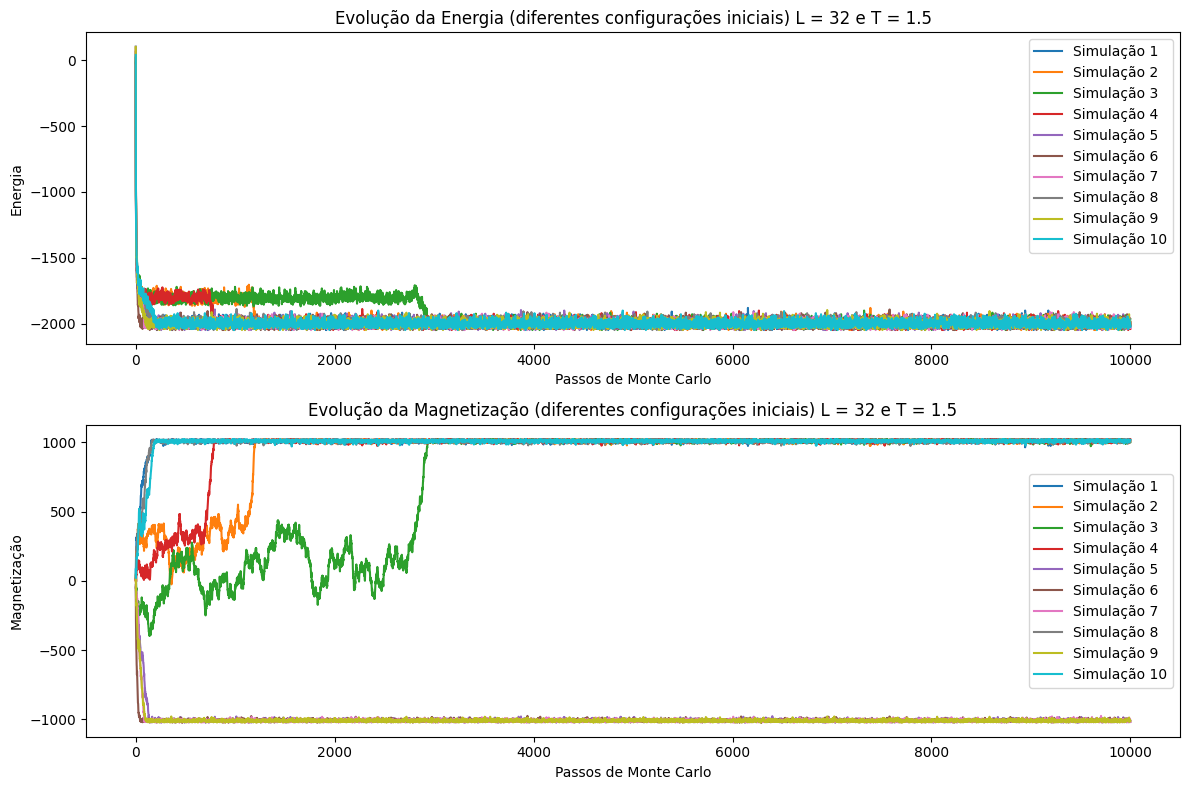

In [ ]:
# Parâmetros de simulação
L = 32 #20  # Tamanho da rede (LxL)
T = 1.5 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Podemos verificar uma diferença com o exemplo dado na especificação do trabalho, existem simulações que nem ao menos alcaçaram a termalização em 3000 passos

Agora faremos outra simulação com uma temperatura mais baixa

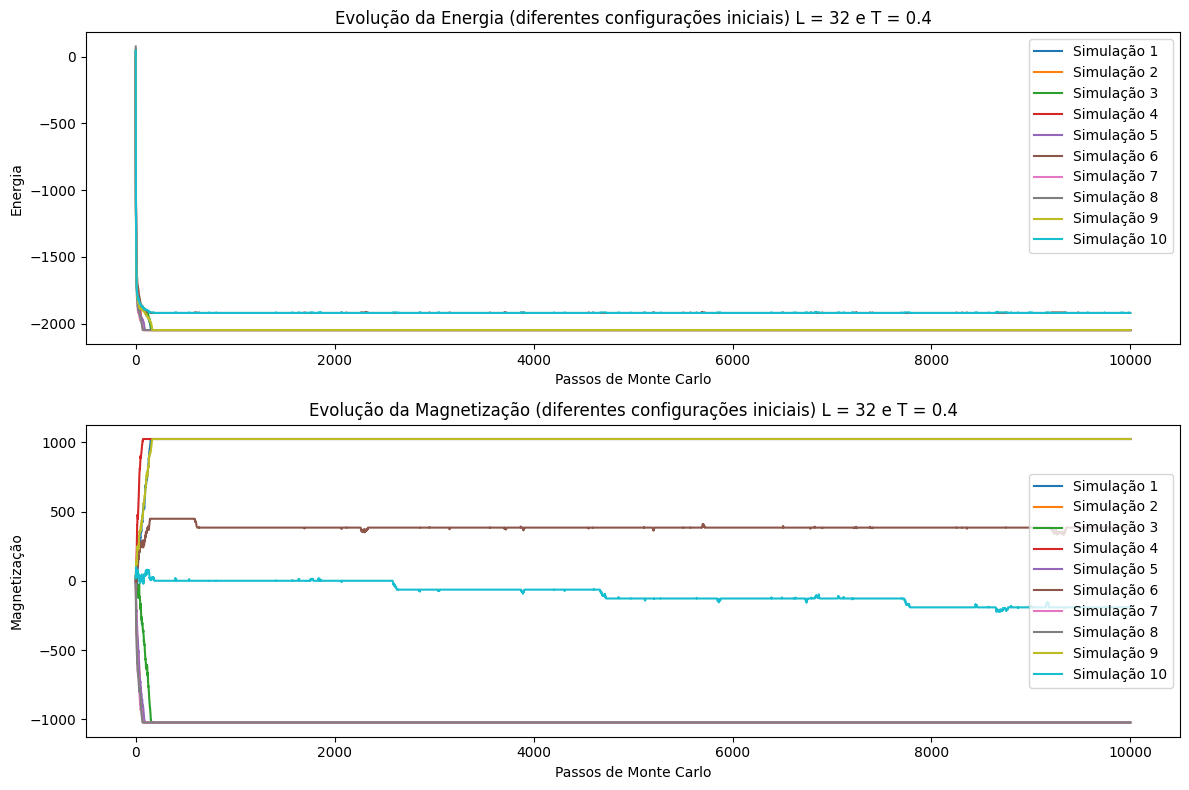

In [ ]:
# Parâmetros de simulação
L = 32 #20  # Tamanho da rede (LxL)
T = 0.4 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Em temperaturas baixas comportamentos estranhos podem ocorrer, casos em que o sistema diminuiu a energia sem alterar significativamente o sistema ocorreram

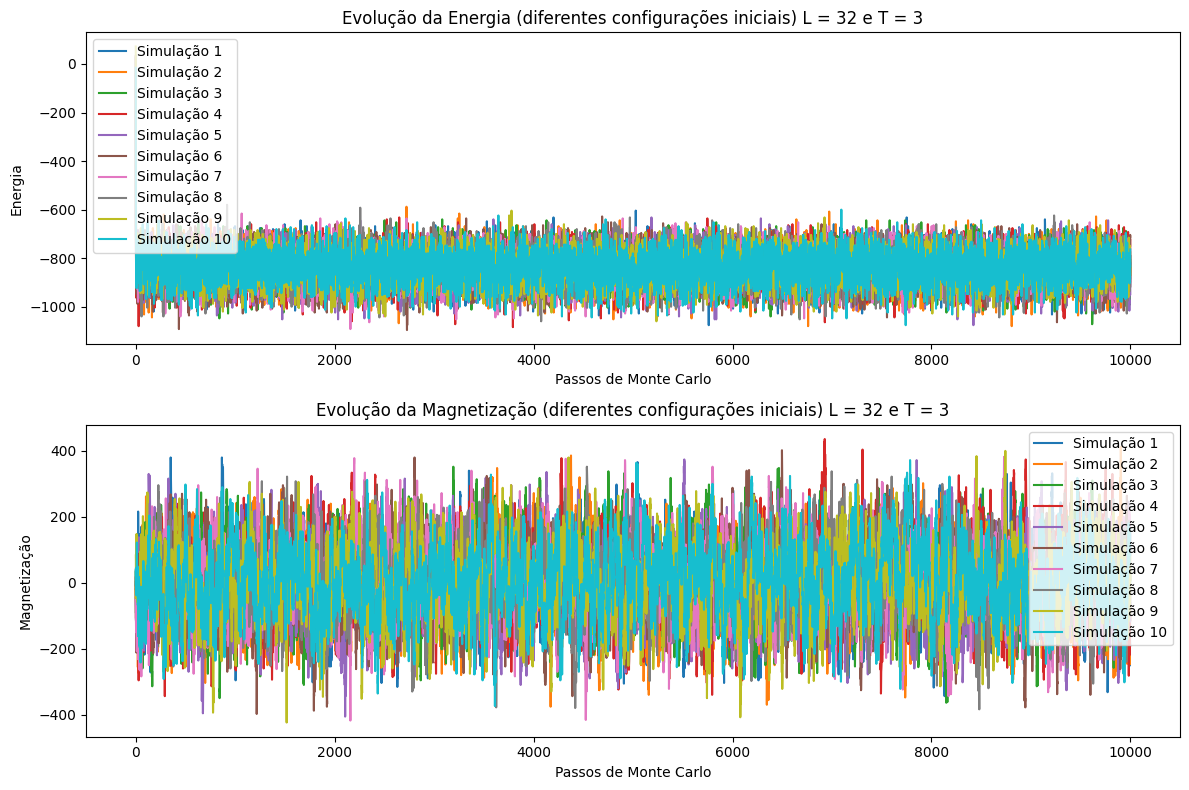

In [ ]:
# Parâmetros de simulação
L = 32 #20  # Tamanho da rede (LxL)
T = 3 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

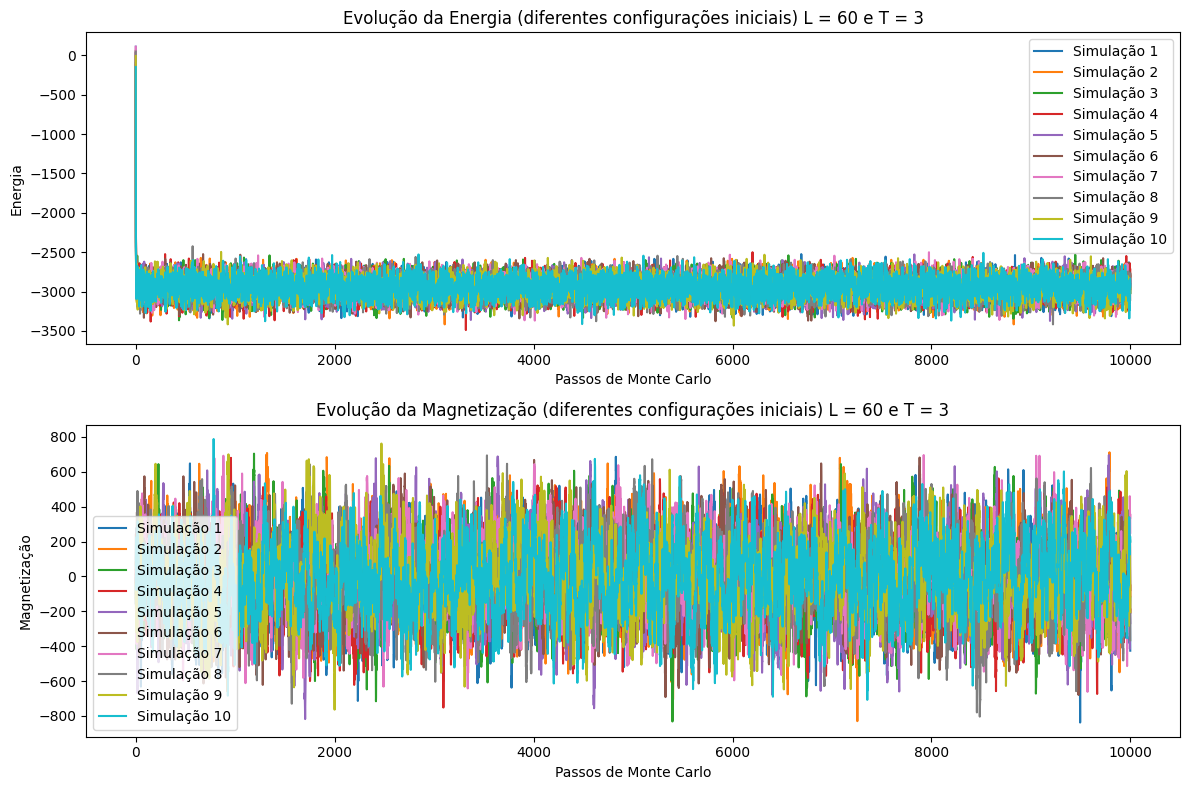

In [ ]:
# Parâmetros de simulação
L = 60 #20  # Tamanho da rede (LxL)
T = 3 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Podemos ver que o comportamento é mais instável, algumas simulações conseguiram oscilar em torno de um valor médio, a magnetização média é aproximadamente 0 para todos, e a energia atinge se estabiliza em valores maiores do que para temperaturas baixas

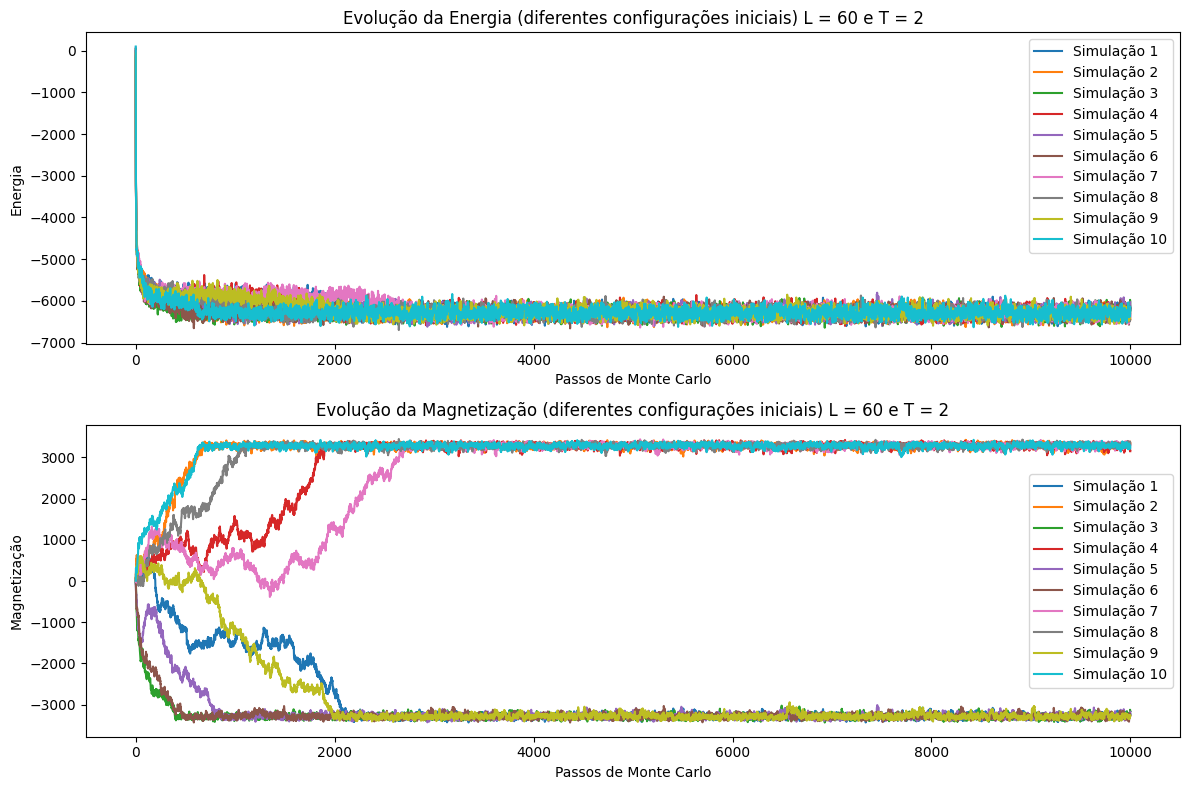

In [ ]:
# Parâmetros de simulação
L = 60 #20  # Tamanho da rede (LxL)
T = 2 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

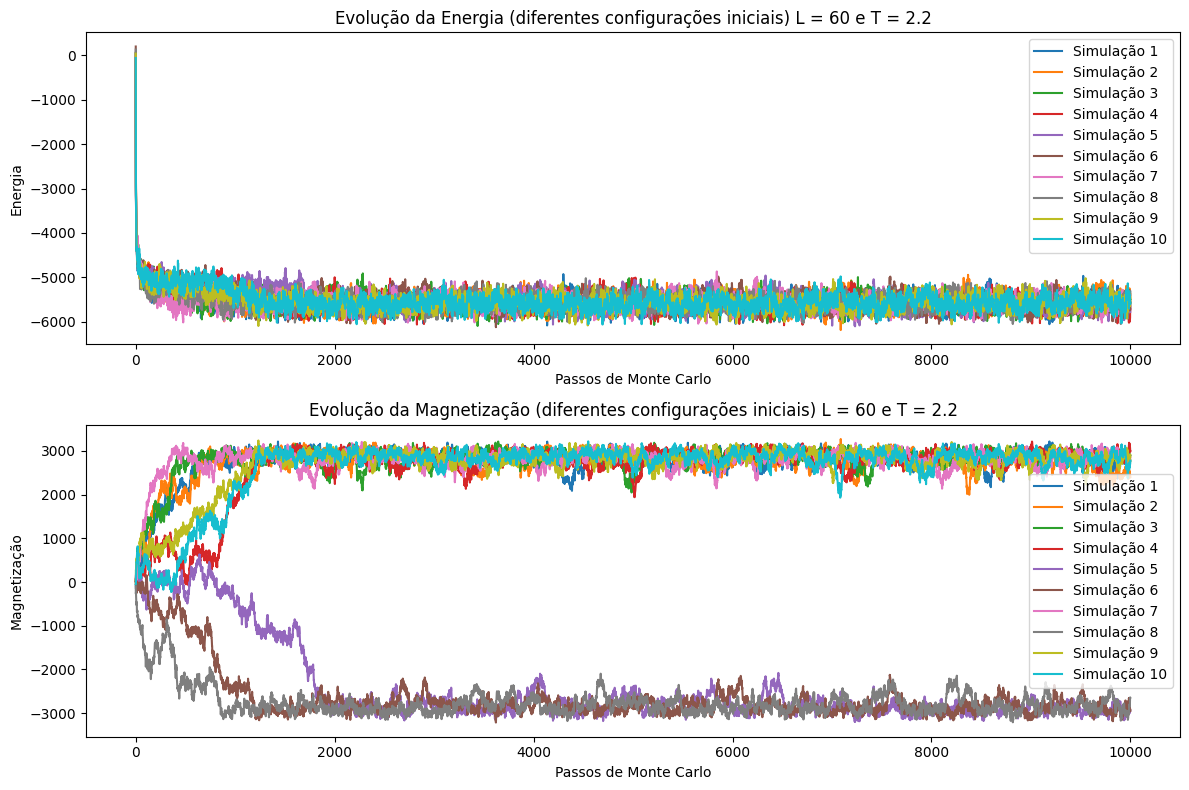

In [ ]:
# Parâmetros de simulação
L = 60 #20  # Tamanho da rede (LxL)
T = 2.2 #2.5  # Temperatura
passos_monte_carlo = 10000
num_simulacoes = 10  # Número de simulações com diferentes configurações iniciais

simulations = []

# Configuração do gráfico
plt.figure(figsize=(12, 8))

for sim in range(num_simulacoes):
    energias, magnetizacoes = simulacao_ising(L, T, passos_monte_carlo)
    simulations.append((energias, magnetizacoes))

# Subgráfico para energias
plt.subplot(2, 1, 1)
for sim in range(num_simulacoes):
    energias, _ = simulations[sim]
    plt.plot(energias, label=f"Simulação {sim + 1}")  # Energia por spin

plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Energia")
plt.title(f"Evolução da Energia (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Subgráfico para magnetizações
plt.subplot(2, 1, 2)
for sim in range(num_simulacoes):
    _, magnetizacoes = simulations[sim]
    plt.plot(magnetizacoes, label=f"Simulação {sim + 1}")  # Magnetização por spin
plt.xlabel("Passos de Monte Carlo")
plt.ylabel("Magnetização")
plt.title(f"Evolução da Magnetização (diferentes configurações iniciais) L = {L} e T = {T}")
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Método dos Blocos e cálculo de calor específico e susceptibilidade magnética

In [ ]:
# Blocking method to estimate statistical errors in energies and specific heat
def blocking_method_energy_and_specif_heat(energies, n_blocks, B, L):
    N = L*L

    block_size = len(energies) // n_blocks
    block_averages1 = []
    block_averages2 = []
    energies2 = energies**2

    for i in range(n_blocks):
        block1 = energies[i * block_size : (i + 1) * block_size]
        block_averages1.append(np.mean(block1))

        block2 = energies2[i * block_size : (i + 1) * block_size]
        block_averages2.append(np.mean(block2))

    block_averages_energy = np.array(block_averages1)
    overall_energy = np.mean(block_averages_energy)
    energy_variance = np.sum((block_averages_energy - overall_energy) ** 2) / (n_blocks - 1)

    energy_err = np.sqrt(energy_variance / n_blocks)

    block_averages_energy2 = np.array(block_averages2)
    overall_energy2 = np.mean(block_averages_energy2)

    specific_heats = (B**2) * (block_averages_energy2 - block_averages_energy**2) / N
    specific_heat = np.mean(specific_heats)
    specific_heat_variance = np.sum((specific_heats - specific_heat)**2) / (n_blocks - 1)

    err_specific_heat = np.sqrt(specific_heat_variance / n_blocks)

    return overall_energy, energy_err, specific_heat, err_specific_heat

In [ ]:
# Blocking method to estimate statistical errors in magnetization and susceptibility
def blocking_method_magnetization_and_susceptibility(magnetizations, n_blocks, B, L):
    N = L * L

    block_size = len(magnetizations) // n_blocks
    block_averages1 = []
    block_averages2 = []
    magnetizations2 = magnetizations**2

    for i in range(n_blocks):
        block1 = magnetizations[i * block_size : (i + 1) * block_size]
        block_averages1.append(np.mean(block1))

        block2 = magnetizations2[i * block_size : (i + 1) * block_size]
        block_averages2.append(np.mean(block2))

    block_averages_magnetization = np.array(block_averages1)
    overall_magnetization = np.mean(block_averages_magnetization)
    magnetization_variance = np.sum((block_averages_magnetization - overall_magnetization) ** 2) / (n_blocks - 1)

    magnetization_err = np.sqrt(magnetization_variance / n_blocks)

    block_averages_magnetization2 = np.array(block_averages2)
    overall_magnetization2 = np.mean(block_averages_magnetization2)

    susceptibilities = (B * (block_averages_magnetization2 - block_averages_magnetization**2)) / N
    susceptibility = np.mean(susceptibilities)
    susceptibility_variance = np.sum((susceptibilities - susceptibility)**2) / (n_blocks - 1)

    susceptibility_err = np.sqrt(susceptibility_variance / n_blocks)

    return overall_magnetization, magnetization_err, susceptibility, susceptibility_err

In [ ]:
# Define the 2D Ising model parameters
L1 = 24  # Linear size of the lattice
N = L * L  # Total number of spins

# Simulation parameters
T_min = 1.0  # Minimum temperature
T_max = 4.0  # Maximum temperature
T_steps = 20  # Number of temperature points
N_mcs = 10000  # Total Monte Carlo steps
n_blocks = 10  # Number of blocks for the blocking method

In [ ]:
# Main simulation
temperatures = np.linspace(T_min, T_max, T_steps)
energies = []
magnetizations = []
specific_heats = []
susceptibilities = []

for T in temperatures:
    beta = 1 / T

    # Perform Monte Carlo simulation using the new function
    energy_samples, magnetization_samples = simulacao_ising(L1, T, N_mcs)

    # Discard initial steps for thermalization
    energy_samples = energy_samples[N_mcs // 2:] / N
    magnetization_samples = magnetization_samples[N_mcs // 2:] / N

    # Compute thermodynamic quantities and their errors
    E_mean, E_err, Cv_mean, Cv_err = blocking_method_energy_and_specif_heat(energy_samples, n_blocks, beta, L)

    M_mean, M_err, X_mean, X_err = blocking_method_magnetization_and_susceptibility(magnetization_samples, n_blocks, beta, L)

    # Store results
    energies.append((E_mean, E_err))
    magnetizations.append((M_mean, M_err))
    specific_heats.append((Cv_mean, Cv_err))
    susceptibilities.append((X_mean, X_err))

In [ ]:
# Preparando os dados para os gráficos
temperatures1 = np.array(temperatures)
energies_mean1 = np.array([e[0] for e in energies])
energies_err1 = np.array([e[1] for e in energies])

magnetizations_mean1 = np.array([m[0] for m in magnetizations])
magnetizations_err1 = np.array([m[1] for m in magnetizations])

specific_heats_mean1 = np.array([cv[0] for cv in specific_heats])
specific_heats_err1 = np.array([cv[1] for cv in specific_heats])

susceptibilities_mean1 = np.array([x[0] for x in susceptibilities])
susceptibilities_err1 = np.array([x[1] for x in susceptibilities])

In [ ]:
# Define the 2D Ising model parameters
L2 = 90  # Linear size of the lattice
N = L * L  # Total number of spins

# Simulation parameters
T_min = 1.0  # Minimum temperature
T_max = 4.0  # Maximum temperature
T_steps = 20  # Number of temperature points
N_mcs = 10000  # Total Monte Carlo steps
n_blocks = 10  # Number of blocks for the blocking method

In [ ]:
# Main simulation
temperatures = np.linspace(T_min, T_max, T_steps)
energies = []
magnetizations = []
specific_heats = []
susceptibilities = []

for T in temperatures:
    beta = 1 / T

    # Perform Monte Carlo simulation using the new function
    energy_samples, magnetization_samples = simulacao_ising(L2, T, N_mcs)

    # Discard initial steps for thermalization
    energy_samples = energy_samples[N_mcs // 2:] / N
    magnetization_samples = magnetization_samples[N_mcs // 2:] / N

    # Compute thermodynamic quantities and their errors
    E_mean, E_err, Cv_mean, Cv_err = blocking_method_energy_and_specif_heat(energy_samples, n_blocks, beta, L)

    M_mean, M_err, X_mean, X_err = blocking_method_magnetization_and_susceptibility(magnetization_samples, n_blocks, beta, L)

    # Store results
    energies.append((E_mean, E_err))
    magnetizations.append((M_mean, M_err))
    specific_heats.append((Cv_mean, Cv_err))
    susceptibilities.append((X_mean, X_err))

In [ ]:
# Preparando os dados para os gráficos
temperatures2 = np.array(temperatures)
energies_mean2 = np.array([e[0] for e in energies])
energies_err2 = np.array([e[1] for e in energies])

magnetizations_mean2 = np.array([m[0] for m in magnetizations])
magnetizations_err2 = np.array([m[1] for m in magnetizations])

specific_heats_mean2 = np.array([cv[0] for cv in specific_heats])
specific_heats_err2 = np.array([cv[1] for cv in specific_heats])

susceptibilities_mean2 = np.array([x[0] for x in susceptibilities])
susceptibilities_err2 = np.array([x[1] for x in susceptibilities])

# Resultados para uma Rede com L = 24

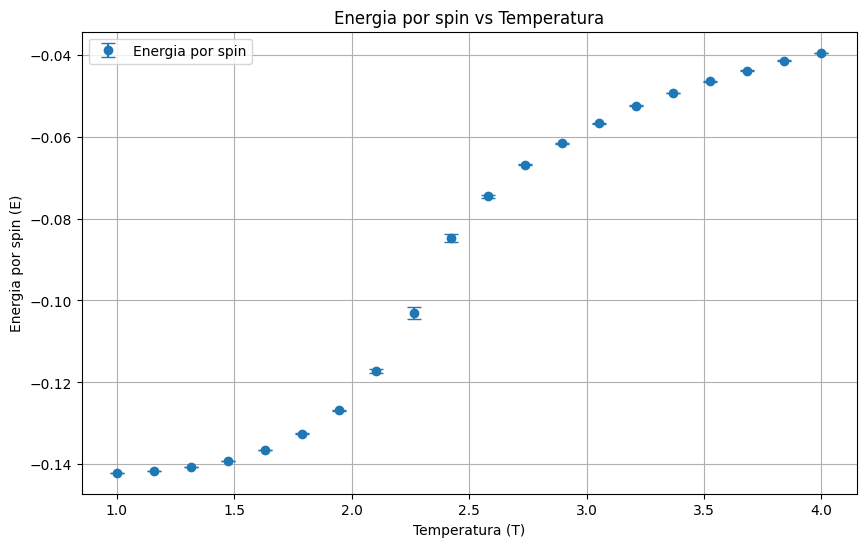

In [ ]:
# Gráfico da energia por spin
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, energies_mean1, yerr=energies_err1, fmt='o', capsize=5, label='Energia por spin')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia por spin (E)')
plt.title('Energia por spin vs Temperatura')
plt.grid()
plt.legend()
plt.show()


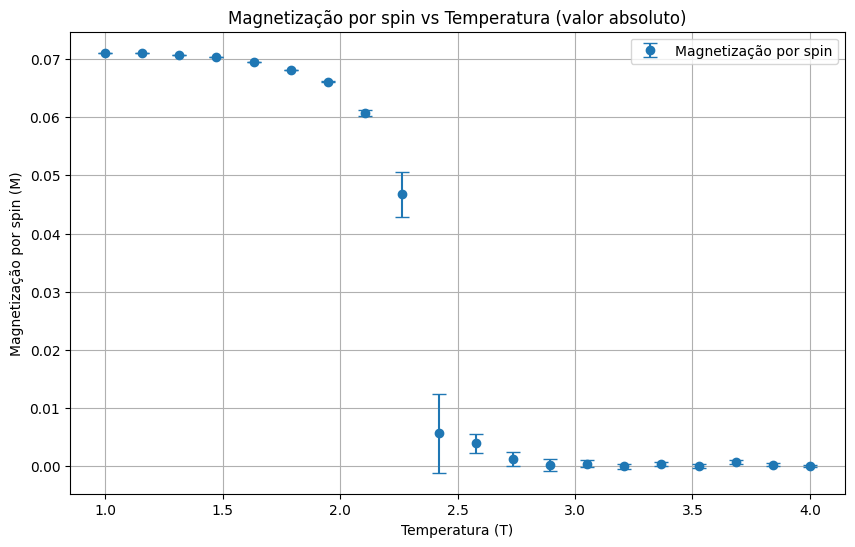

In [ ]:
# Gráfico da magnetização por spin
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, np.abs(magnetizations_mean1), yerr=magnetizations_err1, fmt='o', capsize=5, label='Magnetização por spin')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetização por spin (M)')
plt.title('Magnetização por spin vs Temperatura (valor absoluto)')
plt.grid()
plt.legend()
plt.show()

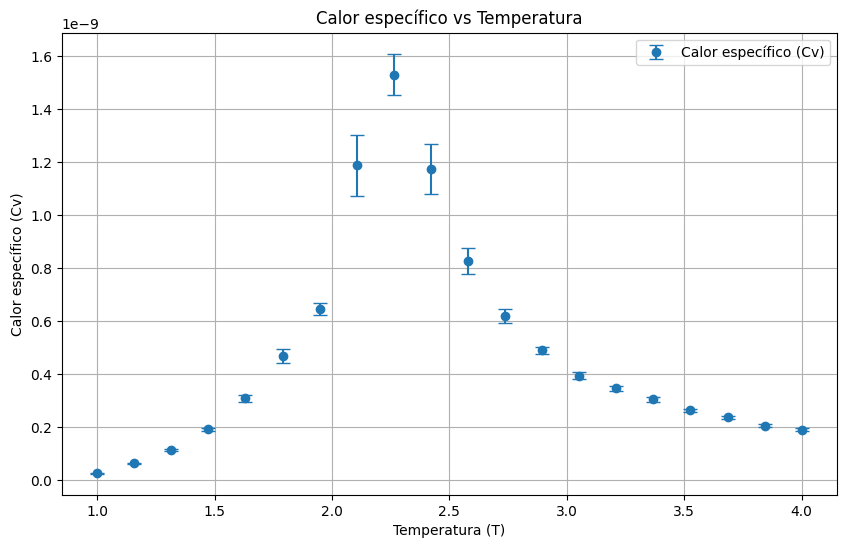

In [ ]:
# Gráfico do calor específico
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, specific_heats_mean1, yerr=specific_heats_err1, fmt='o', capsize=5, label='Calor específico (Cv)')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico (Cv)')
plt.title('Calor específico vs Temperatura')
plt.grid()
plt.legend()
plt.show()

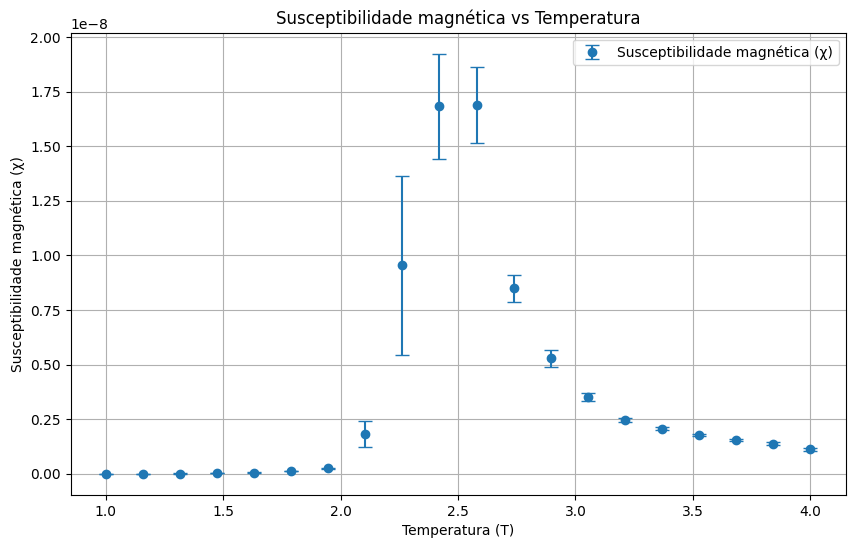

In [ ]:

# Gráfico da susceptibilidade magnética
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, susceptibilities_mean1, yerr=susceptibilities_err1, fmt='o', capsize=5, label='Susceptibilidade magnética (χ)')
plt.xlabel('Temperatura (T)')
plt.ylabel('Susceptibilidade magnética (χ)')
plt.title('Susceptibilidade magnética vs Temperatura')
plt.grid()
plt.legend()
plt.show()

# Resultados para uma rede com L = 90

A seguir serão apresentados gráficos com a relação das estimativas das grandezas obtidas, e também a sua relação de erro estatístico de cada ponto representando uma simulação.

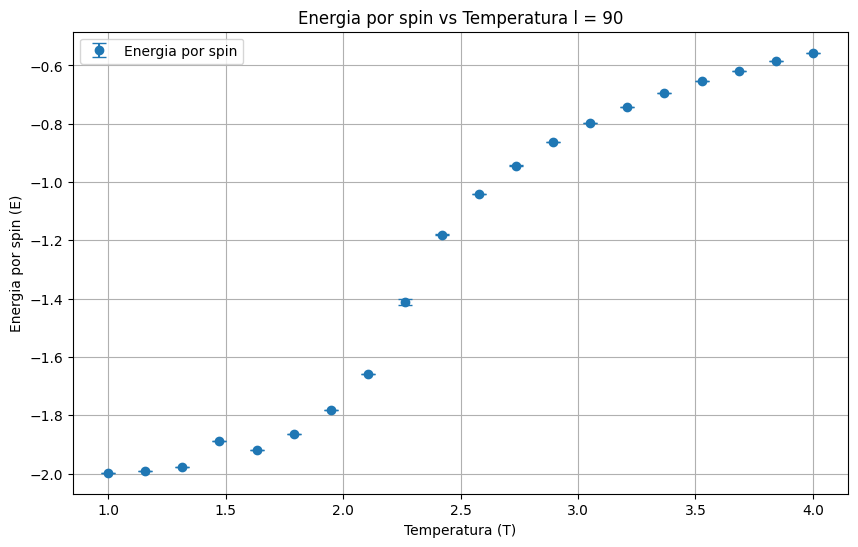

In [ ]:
# Gráfico da energia por spin
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures2, energies_mean2, yerr=energies_err2, fmt='o', capsize=5, label='Energia por spin')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia por spin (E)')
plt.title(f'Energia por spin vs Temperatura l = {L2}')
plt.grid()
plt.legend()
plt.show()

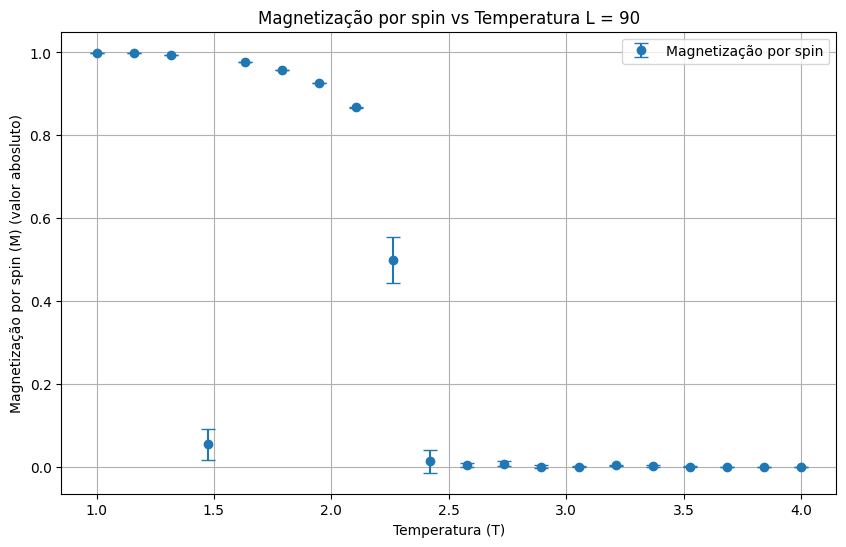

In [ ]:
# Gráfico da magnetização por spin
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures2, np.abs(magnetizations_mean2), yerr=magnetizations_err2, fmt='o', capsize=5, label='Magnetização por spin')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetização por spin (M) (valor abosluto)')
plt.title(f'Magnetização por spin vs Temperatura L = {L2}')
plt.grid()
plt.legend()
plt.show()

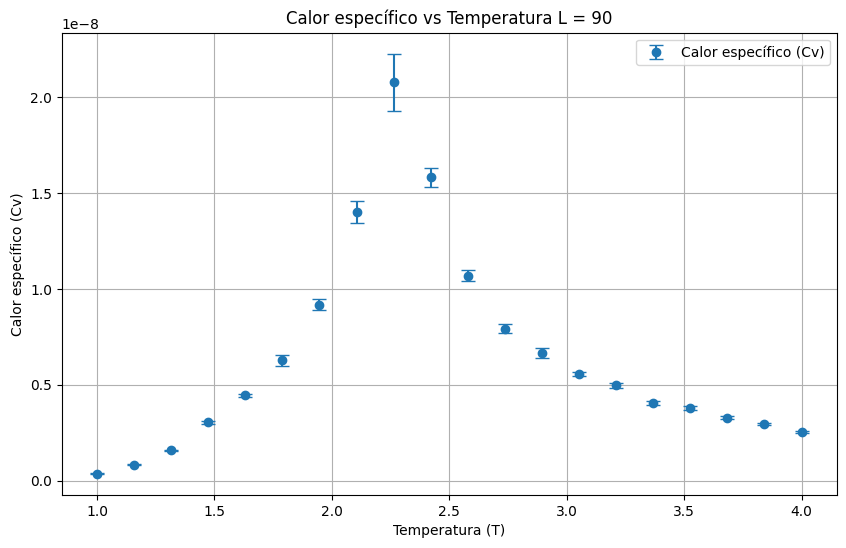

In [ ]:
# Gráfico do calor específico
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures2, specific_heats_mean2, yerr=specific_heats_err2, fmt='o', capsize=5, label='Calor específico (Cv)')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico (Cv)')
plt.title(f'Calor específico vs Temperatura L = {L2}')
plt.grid()
plt.legend()
plt.show()

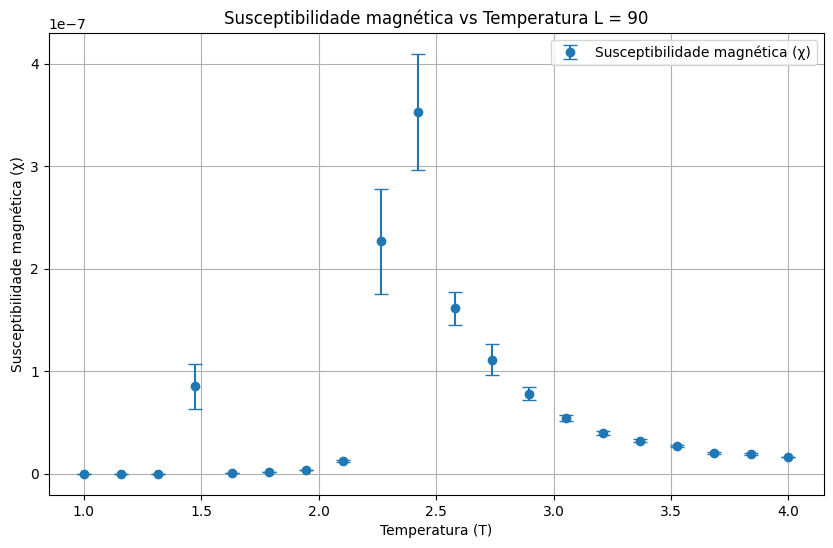

In [ ]:
# Gráfico da susceptibilidade magnética
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures2, susceptibilities_mean2, yerr=susceptibilities_err2, fmt='o', capsize=5, label='Susceptibilidade magnética (χ)')
plt.xlabel('Temperatura (T)')
plt.ylabel('Susceptibilidade magnética (χ)')
plt.title(f'Susceptibilidade magnética vs Temperatura L = {L2}')
plt.grid()
plt.legend()
plt.show()

# Comparando as curvas para tamanho de redes diferentes

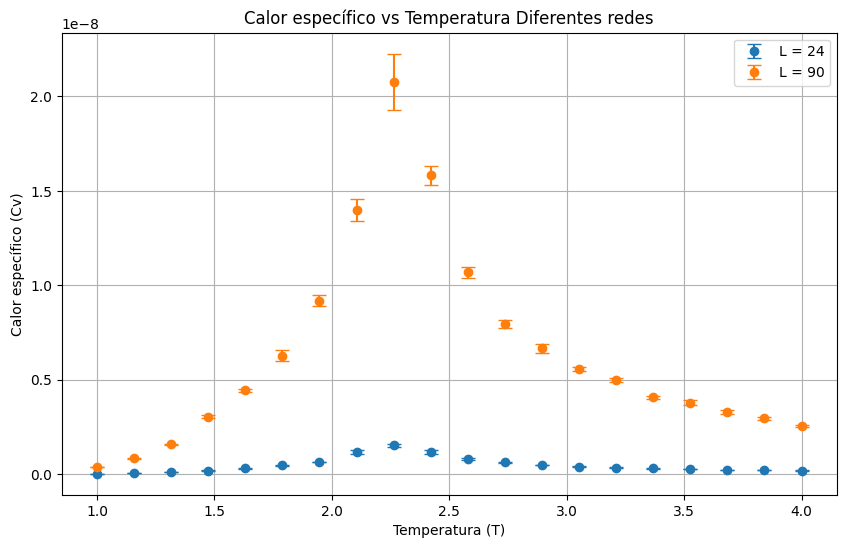

In [ ]:
# Gráfico do calor específico
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, specific_heats_mean1, yerr=specific_heats_err1, fmt='o', capsize=5, label='L = 24')
plt.errorbar(temperatures2, specific_heats_mean2, yerr=specific_heats_err2, fmt='o', capsize=5, label='L = 90')
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor específico (Cv)')
plt.title(f'Calor específico vs Temperatura Diferentes redes')
plt.grid()
plt.legend()
plt.show()

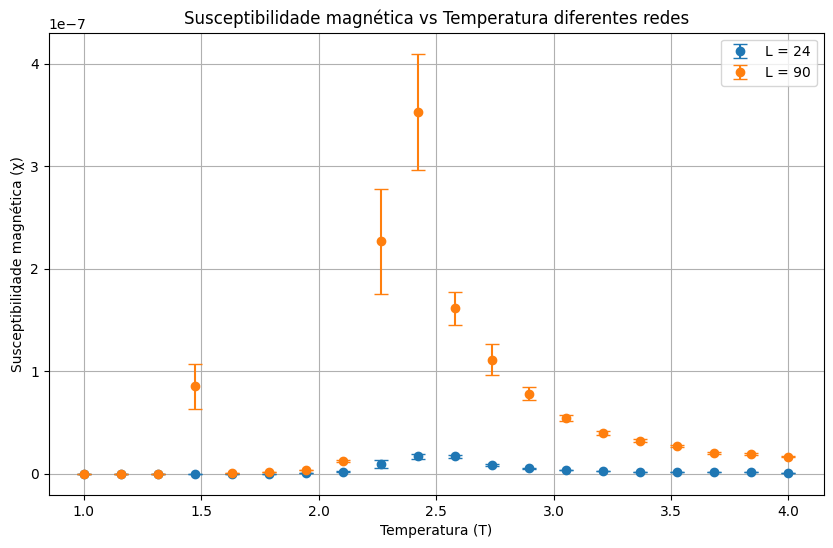

In [ ]:
# Gráfico da susceptibilidade magnética
plt.figure(figsize=(10, 6))
plt.errorbar(temperatures1, susceptibilities_mean1, yerr=susceptibilities_err1, fmt='o', capsize=5, label='L = 24')
plt.errorbar(temperatures2, susceptibilities_mean2, yerr=susceptibilities_err2, fmt='o', capsize=5, label='L = 90')
plt.xlabel('Temperatura (T)')
plt.ylabel('Susceptibilidade magnética (χ)')
plt.title(f'Susceptibilidade magnética vs Temperatura diferentes redes')
plt.grid()
plt.legend()
plt.show()

# Respostas



1) Após uma sequência de execução do algoritmo de metropolis, observei que com 10000 passos, tamanho das caixas de 1000 passos, e uma opção de descartamento das 2 caixas iniciais de termalização, os resultados foram satisfatórios. Com mais passos de monte carlo, os resultados seriam melhores.

2) A energia por spin Diminui com o aumento da temperatura, atingindo um valor mínimo em baixas temperaturas (ordem máxima no sistema) e aproximando-se de zero em altas temperaturas (estado desordenado). A transição é suave, exceto próximo da temperatura crítica, onde há uma mudança mais significativa.

Magnetização por spin: Em baixas temperaturas, o sistema apresenta magnetização alta (estado ordenado). Com o aumento da temperatura, a magnetização cai drasticamente próximo a temperatura crítica e se aproxima de zero para altas temperaturas, indicando a transição para o estado desordenado.

Calor específico : Exibe um pico acentuado na temperatura crítica, indicando grandes flutuações de energia associadas à transição de fase.

Susceptibilidade magnética : Também apresenta um pico na temperatura crítica, refletindo flutuações da magnetização. O valor do pico aumenta com o tamanho do sistema.

Todas essas informações podem ser observadas nos respectivos gráficos logo acima.

3) Pude observar que nos valores de temperatura extremos temperaturas baixas e altas onde os estados do sistema são bem definidos tem comportamentos independentes do tamanho do sistema, mudando para a região de temperatura crítica, apresentando picos maiores para redes maiores e também um ligeiro deslocamento da região de troca de fase. Esses dados podem ser observados comparando os resultados obtidos visualizados no gráficos acima, entre uma rede de L = 24 e L = 90. A curva da magnetização apresenta uma queda mais abrupta para redes maiores.

4) Os erros estatísticos são maiores perto da temperatura crítica isso acontece pois o modelo está indeciso sobre qual é seu estados (ordenado ou desordenado) apresentando flutuações significativas, que tornam o sistema mais difícil de equilibrar e aumentam a variância nas medidas. Os erros aparentam ser maiores conforme a rede aumenta. O que faz sentido devido as flutuações serem mais significativas.

5) Fase ordenada (Temperaturas baixas): O sistema apresenta alta magnetização devido ao alinhamento dos spins. A energia é baixa e as flutuações são pequenas.
Fase desordenada (Temperaturas altas): O sistema é desordenado, com magnetização média próxima de zero. A energia é maior, mas uniforme, com flutuações menores em altas temperaturas.
Transição de fase (Região de temperaturas críticas): Caracterizada por flutuações críticas, com picos no calor específico e na susceptibilidade magnética. O sistema muda de um estado ordenado para desordenado.

6) O valor estimado é 2.2, observando os dados das simulações


6) O valor estimado é 2.2, observando os dados das simulações

Text(0.5, 1.0, 'Pra não cortar as respostas')

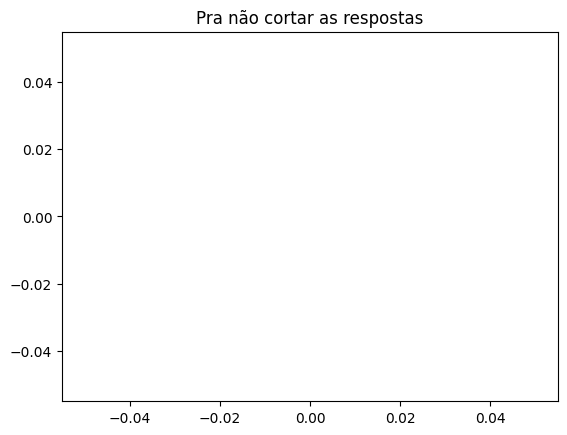

In [ ]:
plt.plot()
plt.title("Pra não cortar as respostas")